### HMM: CpG Islands
Using R for finding HMM (hidden Markov model) given observed data. Unfair coin example used (Which can be transformed to CpG Islands problem).

R kernel must be installed <br>
(see `README.md`)

Using `HMM`:

In [1]:
library(HMM)

Define original model:

In [2]:
# initial:
hmm_original = initHMM(c("A","B"),c("L","R"),
                       startProbs=c(0.9,0.1),
                       transProbs=matrix(c(.9,.5,.1,.5),2),
                       emissionProbs=matrix(c(.9,.5,.1,.5),2))
print(hmm_original)
# Sequence of observation
# a = sample(c(rep("L",100),rep("R",300)))
# b = sample(c(rep("L",300),rep("R",100)))
# observation = c(a,b)


$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.9 0.1 

$transProbs
    to
from   A   B
   A 0.9 0.1
   B 0.5 0.5

$emissionProbs
      symbols
states   L   R
     A 0.9 0.1
     B 0.5 0.5



Initial model:

In [3]:
hmm_init = initHMM(c("A","B"),c("L","R"),
                   transProbs=matrix(c(.5,.5,.5,.5),2),
                   emissionProbs=matrix(c(.5,.5,.5,.5),2))
print(hmm_init)

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from   A   B
   A 0.5 0.5
   B 0.5 0.5

$emissionProbs
      symbols
states   L   R
     A 0.5 0.5
     B 0.5 0.5



Generate observed data:

In [4]:
observations = simHMM(hmm_original, 300) 

In [5]:
observations$observation[1:7]
# observations

[1] "L" "R" "L" "L" "R" "L" "R"

Using Baum-Welch for model inference:<br>
(REF: https://en.wikipedia.org/wiki/Baum-Welch_algorithm)

In [6]:
# Baum-Welch
bw = baumWelch(hmm_init,observations$observation, maxIterations=900, 10)

Resulting model:

In [7]:
print(bw$hmm)

$States
[1] "A" "B"

$Symbols
[1] "L" "R"

$startProbs
  A   B 
0.5 0.5 

$transProbs
    to
from   A   B
   A 0.5 0.5
   B 0.5 0.5

$emissionProbs
      symbols
states    L    R
     A 0.82 0.18
     B 0.82 0.18



In [8]:
# print(baumWelch)

Using `aphid`:<br>
(REF: https://cran.r-project.org/web/packages/aphid/vignettes/aphid-vignette.html)

In [9]:
library("aphid")

Registered S3 method overwritten by 'openssl':
  method      from
  print.bytes Rcpp

Attaching package: ‘aphid’

The following objects are masked from ‘package:HMM’:

    backward, forward, posterior



Original model:

        to
from     Begin unfair fair
  Begin      0    0.9  0.1
  unfair     0    0.9  0.1
  fair       0    0.5  0.5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0.9 0.1
  fair   0.5 0.5


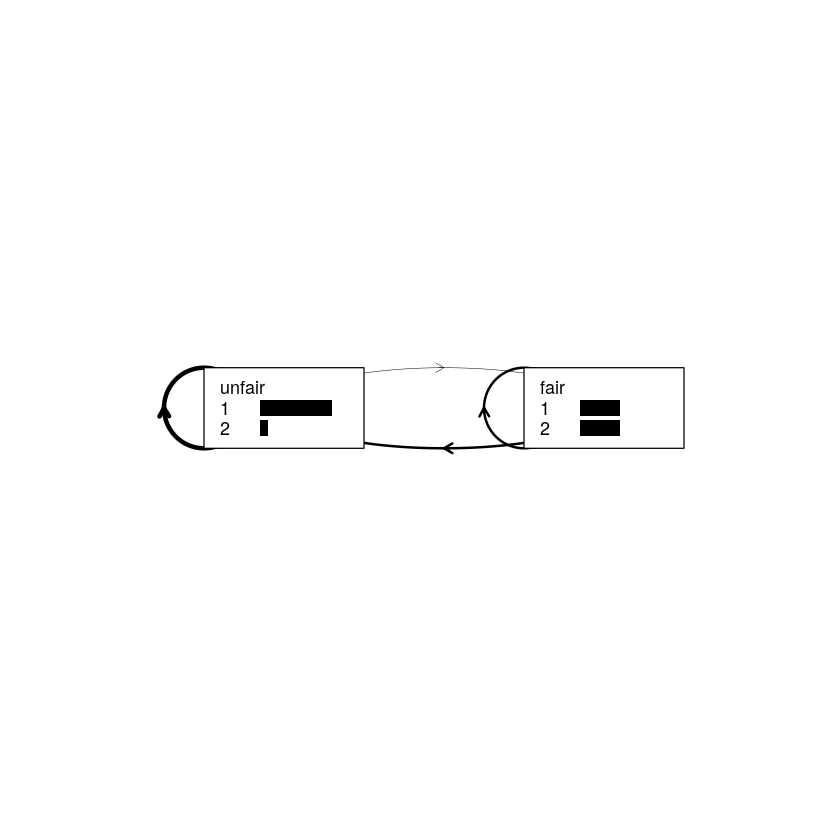

In [10]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
A <- matrix(c(0, 0, 0,
              0.9, 0.9, 0.5,
              0.1, 0.1, 0.5), nrow = 3)
dimnames(A) <- list(from = states, to = states)
print(A)

### Define emission probability matrix E
E <- matrix(c(0.9, 0.1,
              0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(E) <- list(states = states[-1], coins = coins)
print(E)

### Create the HMM object
hmm_original1 <- structure(list(A = A, E = E), class = "HMM")
# par(fin=c(5,3))
plot(hmm_original1,textexp = 1.5)


Separate observable ("L" - left, "R" - right) from hidden ("fair", "unfair" coins):

In [11]:
obs = c("1", "2")[match(observations$observation, c("L", "R"))]
sts = c("unfair", "fair")[match(list(observations$states)[[1]], c("A", "B"))]

In [12]:
# dict like mixing hidden and observable:
names(obs) <- sts

In [13]:
list(obs[1:7])[[1]]

unfair unfair unfair   fair   fair unfair unfair 
   "1"    "2"    "1"    "1"    "2"    "1"    "2"

In [14]:
observable_only <- c("1","2")[match(observations$observation, c("L", "R"))]
print(observable_only[1:7])

[1] "1" "2" "1" "1" "2" "1" "2"


### Using Viterbi alg
to find most possible path (i.e. hidden variables states (coin in that example)). Original model is given.
(REF: https://en.wikipedia.org/wiki/Viterbi_algorithm)

In [15]:
# Viterbi(x, obs)
# (casino)
vit <- Viterbi(hmm_original1, observable_only)

In [16]:
# print(Viterbi.HMM)

Comparing actual and predicted hidden states:

In [17]:
actual <- c("F", "L")[match(names(obs), c("fair", "unfair"))]
print("actual:")
print(actual[1:100])
predicted <- c("L", "F")[vit$path + 1]
print("predicted:")
print(predicted[1:100])

[1] "actual:"
  [1] "L" "L" "L" "F" "F" "L" "L" "L" "L" "L" "F" "L" "L" "L" "L" "F" "L" "L"
 [19] "L" "L" "F" "F" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "F" "F" "L"
 [37] "L" "L" "L" "L" "L" "L" "L" "L" "L" "F" "L" "F" "F" "L" "L" "L" "L" "F"
 [55] "F" "F" "L" "L" "F" "F" "L" "L" "L" "L" "L" "L" "L" "L" "F" "F" "L" "F"
 [73] "F" "F" "L" "L" "L" "L" "L" "L" "L" "F" "F" "L" "L" "L" "L" "L" "L" "F"
 [91] "F" "F" "L" "L" "L" "L" "F" "L" "L" "L"
[1] "predicted:"
  [1] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [19] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [37] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "F"
 [55] "F" "F" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [73] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"
 [91] "L" "L" "L" "L" "L" "L" "L" "L" "L" "L"


In [18]:
# starts <- c("L", actual) == "F" & c(actual, "F") == "L"
# actual == "F" & actual == "L"

### Derive HMM from `observed/states` ( `emission/transition`) data i.e. when hidden states also given (as opposite to `train` method, where they unknown):

In [19]:
hmm_derived <- deriveHMM(list(obs), logspace = FALSE)

        to
from     Begin    unfair       fair
  Begin      0 0,9817073 0,01829268
  unfair     0 0,8959399 0,10406014
  fair       0 0,5305885 0,46941146
        residue
state            1         2
  unfair 0,8684878 0,1315122
  fair   0,5713907 0,4286093


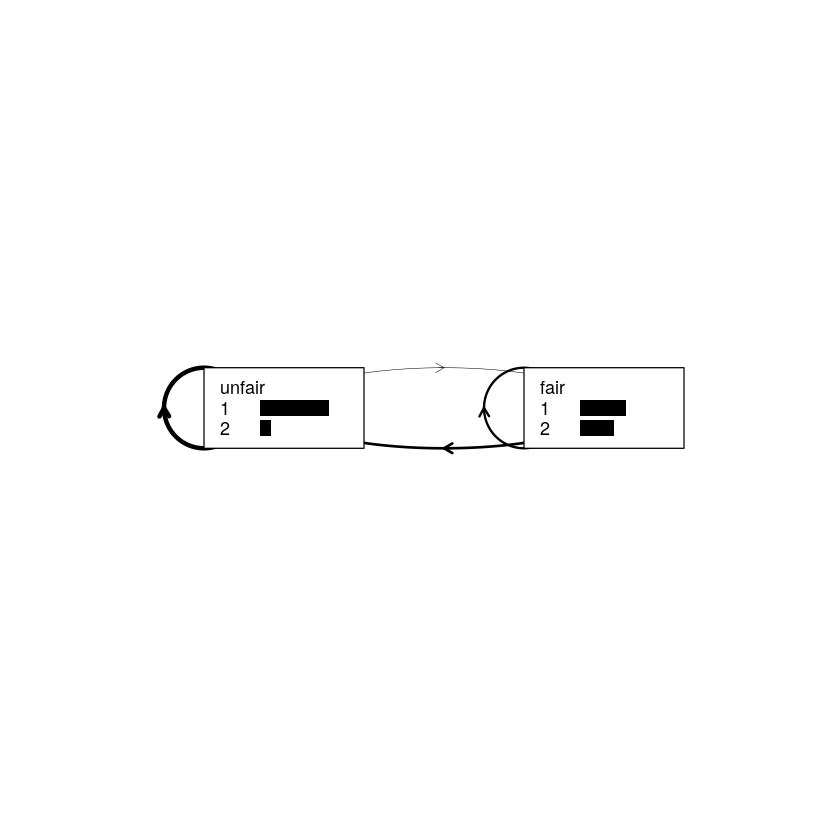

In [20]:
print(hmm_derived$A)
print(hmm_derived$E)
plot(hmm_derived, textexp = 1.5)

In [21]:
# print(deriveHMM)

### Baum-Welch and Viterbi training
(No hidden states given, only observable (emission))

Train with $P(Fair/Unfair|begin)=[0.5, 0.5]$

Initial model:

In [28]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
iA <- matrix(c(0, 0, 0,
              0.5, 0.5, 0.5,
              0.5, 0.5, 0.5), nrow = 3)
dimnames(iA) <- list(from = states, to = states)
print(iA)

### Define emission probability matrix E
iE <- matrix(c(0.5, 0.5,
               0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(iE) <- list(states = states[-1], coins = coins)
print(iE)

### Create the HMM object
hmm_initial1 <- structure(list(
    A = iA, E = iE), class = "HMM")
# par(fin=c(5,3))
# plot(hmm_initial,textexp = 1.5)


        to
from     Begin unfair fair
  Begin      0    0,5  0,5
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0,5 0,5
  fair   0,5 0,5


In [29]:
# train data:
observable_only = c("1", "2")[match(observations$observation, c("L", "R"))]
observable_only[1:7]

[1] "1" "2" "1" "1" "2" "1" "2"

BaumWelch:

In [30]:
hmm_trained_bw <- train(hmm_initial1, observable_only, method = "BaumWelch", 
                        deltaLL = 0.01, seqweights = NULL)

Iteration 1 log likelihood = -207,9442 
Iteration 2 log likelihood = -141,4358 
Iteration 3 log likelihood = -141,4358 
Convergence threshold reached after 3 EM iterations


Results:

In [31]:
print(hmm_trained_bw$A)
print(hmm_trained_bw$E)

        to
from     Begin unfair fair
  Begin      0    0,5  0,5
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
        coins
states           1         2
  unfair 0,8157895 0,1842105
  fair   0,8157895 0,1842105


Viterbi:

In [32]:
hmm_trained_v <- train(hmm_initial1, observable_only, method = "Viterbi", 
                       deltaLL = 0.01, seqweights = NULL)

Iteration 1 
Iteration 2 
Iteration 3 
Iteration 4 
Iteration 5 
Iteration 6 
Iteration 7 
Paths were identical after 7 iterations


Results:

In [33]:
print(hmm_trained_v$A)
print(hmm_trained_v$E)

        to
from     Begin      unfair        fair
  Begin      0 0,333333333 0,666666667
  unfair     0 0,006622517 0,993377483
  fair       0 0,993421053 0,006578947
        residue
state            1         2
  unfair 0,7828947 0,2171053
  fair   0,8486842 0,1513158


So both algorithms give bad results.

Train with $P(Fair/Unfair|begin)=[0.9, 0.1]$<br>
(same init as for original):

In [34]:
states <- c("Begin", "unfair", "fair")
coins <- 1:2

### Define transition probability matrix A
iA1 <- matrix(c(0, 0, 0,
              0.9, 0.5, 0.5,
              0.1, 0.5, 0.5), nrow = 3)
dimnames(iA1) <- list(from = states, to = states)
print(iA1)

### Define emission probability matrix E
iE1 <- matrix(c(0.5, 0.5,
                0.5, 0.5), nrow = 2, byrow = TRUE)
print(states[-1])
dimnames(iE1) <- list(states = states[-1], coins = coins)
print(iE1)

### Create the HMM object
hmm_initial12 <- structure(list(
    A = iA1, E = iE1), class = "HMM")
# par(fin=c(5,3))
# plot(hmm_initial,textexp = 1.5)


        to
from     Begin unfair fair
  Begin      0    0,9  0,1
  unfair     0    0,5  0,5
  fair       0    0,5  0,5
[1] "unfair" "fair"  
        coins
states     1   2
  unfair 0,5 0,5
  fair   0,5 0,5


BaumWelch:

In [35]:
hmm_trained_bw1 <- train(hmm_initial12, observable_only, method = "BaumWelch", 
                         deltaLL = 0.01, seqweights = NULL)


Iteration 1 log likelihood = -207,9442 
Iteration 2 log likelihood = -141,4357 
Iteration 3 log likelihood = -141,4358 
Convergence threshold reached after 3 EM iterations


Results:

In [36]:
print(hmm_trained_bw1$A)
print(hmm_trained_bw1$E)

        to
from     Begin    unfair      fair
  Begin      0 0,5149735 0,4850265
  unfair     0 0,5000114 0,4999886
  fair       0 0,5000149 0,4999851
        coins
states           1         2
  unfair 0,8164554 0,1835446
  fair   0,8151231 0,1848769


Viterbi:

In [39]:
hmm_trained_v1 <- train(hmm_initial12, observable_only, method = "Viterbi", 
                        deltaLL = 0.001, maxiter=300, seqweights = NULL)


Iteration 1 
Iteration 2 
Iteration 3 
Paths were identical after 3 iterations


Results:

In [40]:
print(hmm_trained_v1$A)
print(hmm_trained_v1$E)

        to
from     Begin    unfair        fair
  Begin      0 0,6666667 0,333333333
  unfair     0 0,9966777 0,003322259
  fair       0 0,5000000 0,500000000
        residue
state            1         2
  unfair 0,8178808 0,1821192
  fair   0,5000000 0,5000000


Sometimes good, some not.

Try using several seq's instead of one:

In [42]:
observations = simHMM(hmm_original, 1000)

# train data:
observable_only = c("1", "2")[match(observations$observation, c("L", "R"))]
observable_only[1:7]

[1] "1" "1" "2" "1" "2" "1" "1"

In [43]:
# create 10 examples:
seqs = list(length=100)
l = 100
for(i in 0:(l-1))
{
    if(((i+1)*l+i) <=1000)
        {
         seqs[[i+1]]<-observable_only[(i*l+i):((i+1)*l+i)]
        }
}
# seqs

In [45]:
seqs

$length
  [1] "1" "1" "2" "1" "2" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2"
 [55] "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1" "1" "1"
 [73] "1" "1" "2" "1" "1" "2" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "2"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

[[2]]
  [1] "2" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "2" "2" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [55] "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "1" "1" "1" "1" "2" "2" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

[[3]]
  [1] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1"
 [55] "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2"
 [73] "1" "1" "1" "2" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1"

[[4]]
  [1] "1" "1" "2" "2" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [19] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "2" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1"
 [55] "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

[[5]]
  [1] "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "2" "1" "1" "1" "2" "1" "1" "1" "1" "1" "2" "1" "1" "1"
 [55] "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "2" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1"

[[6]]
  [1] "1" "2" "2" "2" "2" "2" "2" "2" "2" "2" "1" "1" "1" "1" "1" "1" "1" "2"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1"
 [37] "1" "1" "1" "1" "1" "2" "2" "2" "1" "1" "2" "2" "1" "1" "1" "1" "1" "1"
 [55] "1" "1" "1" "1" "2" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "2" "1"
 [73] "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "1" "1"
 [91] "1" "1" "2" "1" "1" "1" "1" "1" "2" "1" "1"

[[7]]
  [1] "1" "2" "2" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2"
 [19] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "2" "2" "2" "2" "2" "1" "1" "1" "2" "1"
 [55] "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [73] "1" "2" "2" "1" "1" "1" "2" "1" "1" "1" "1" "2" "2" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"

[[8]]
  [1] "1" "1" "2" "2" "1" "1" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1"
 [19] "1" "2" "2" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "1" "1" "2"
 [55] "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "2" "1" "1" "1" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "2" "2" "2" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1"

[[9]]
  [1] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1"
 [19] "1" "2" "1" "1" "1" "2" "1" "1" "1" "2" "1" "2" "1" "1" "1" "1" "1" "1"
 [37] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "2" "1" "1" "1" "1" "2" "2"
 [55] "1" "2" "1" "1" "2" "1" "2" "2" "1" "1" "1" "2" "2" "1" "1" "2" "1" "1"
 [73] "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1" "1"
 [91] "1" "1" "1" "1" "1" "1" 

In [54]:
hmm_trained_v1 <- train(hmm_initial1, seqs, method = "Viterbi", 
                        deltaLL = 0.001, maxiter=300, seqweights = NULL)


Iteration 1 
Iteration 2 
Iteration 3 
Iteration 4 
Paths were identical after 4 iterations


In [55]:
print(hmm_trained_v1$A)
print(hmm_trained_v1$E)

        to
from     Begin    unfair        fair
  Begin      0 0,8181818 0,181818182
  unfair     0 0,9988777 0,001122334
  fair       0 0,1666667 0,833333333
        residue
state            1         2
  unfair 0,8622222 0,1377778
  fair   0,1666667 0,8333333


Worse?